In [22]:
import pandas as pd
import json, ast, re
import numpy as np
import time, wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

In [23]:
init_time = time.time()
data = pd.read_csv("data//review.csv")
time.time() - init_time

46.4149534702301

In [24]:
init_time = time.time()
business = pd.read_csv("data//business2.csv")
time.time() - init_time

1.9399988651275635

In [25]:
init_time = time.time()
restaurant = pd.read_csv("data//model//pizza2.csv")
time.time() - init_time

0.09399962425231934

In [26]:
data[:5]

,Unnamed: 0,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1,Q1sbwvVQXV2734tPgoKj4Q,1.0,Total bill for this horrible service? Over $8G...,6,hG7b0MtEbXx5QzbzE6C_VA
1,1,NZnhc2sEQy3RmzKTZnqtwQ,0,2017-01-14 21:30:33,0,GJXCdrto3ASJOqKeVWPi6Q,5.0,I *adore* Travis at the Hard Rock's new Kelly ...,0,yXQM5uF2jS6es16SJzNHfg
2,2,WTqjgwHlXbSFevF32_DJVw,0,2016-11-09 20:09:03,0,2TzJjDVDEuAW6MR5Vuc1ug,5.0,I have to say that this office really has it t...,3,n6-Gk65cPZL6Uz8qRm3NYw
3,3,ikCg8xy5JIg_NGPx-MSIDA,0,2018-01-09 20:56:38,0,yi0R0Ugj_xUx_Nek0-_Qig,5.0,Went in for a lunch. Steak sandwich was delici...,0,dacAIZ6fTM6mqwW5uxkskg
4,4,b1b1eb3uo-w561D0ZfCEiQ,0,2018-01-30 23:07:38,0,11a8sVPMUFtaC7_ABRkmtw,1.0,Today was my second out of three sessions I ha...,7,ssoyf2_x0EQMed6fgHeMyQ


In [27]:
data['name'] = data['business_id'].map(restaurant.set_index('business_id')['name']) #giving review data corresponding restaurant name
#data.isnull().sum(axis=0)
restaurant_top = data.name.value_counts().index[:30].tolist() #selecting top 30 popular pizza restaurants
review_top = data.loc[data['name'].isin(restaurant_top)] #selecting the reviews of above top 30 pizza restaurants

In [28]:
review_top.loc[review_top['name']=='Egg & I'].count()

Unnamed: 0     3350
business_id    3350
cool           3350
date           3350
funny          3350
review_id      3350
stars          3350
text           3350
useful         3350
user_id        3350
name           3350
dtype: int64

In [29]:
review_top.loc[review_top['name']=='Egg & I'].cool.mean()

0.2904477611940299

In [ ]:
stopwords=set(STOPWORDS)
text= ' '
for review in  range(len(review_top)):
    text_vec=str(data.iloc[review].text)
    token=text_vec.split()
    for i in range(len(token)): 
        token[i] = token[i].lower() 
    for word in token:
        text=text+word+' '

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(text) 

C:\Users\Tansu\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Top 10 Popular Restaurant')

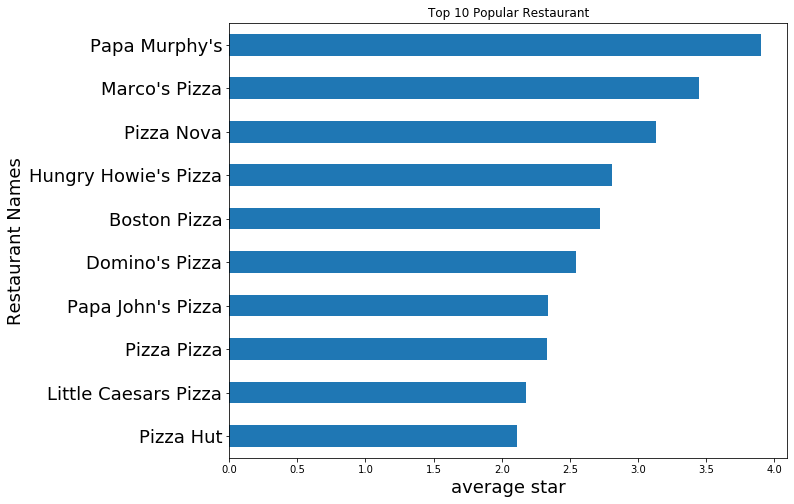

In [24]:
restaurant_top10 = restaurant.name.value_counts().index[:10].tolist() #selecting top 30 of most spearding pizza restaurants
review_top10 = data.loc[data['name'].isin(restaurant_top10)] #selecting the reviews of above top 30 pizza restaurants
review_top10.groupby(review_top10.name)['stars'].mean().sort_values(ascending=True).plot('barh', figsize=(10,8))
plt.yticks(fontsize=18)
plt.xlabel("average star", fontsize=18)
plt.ylabel("Restaurant Names", fontsize=18)
plt.title("Top 10 Popular Restaurant")

In [25]:
restaurant.name.value_counts()

Pizza Hut                        320
Domino's Pizza                   209
Papa John's Pizza                152
Little Caesars Pizza             112
Pizza Pizza                      102
                                ... 
Woot!                              1
Showcase Pizza                     1
Pizzeria Da Enzo                   1
Rudy's Subs                        1
Stancato's Italian Restaurant      1
Name: name, Length: 4047, dtype: int64

rating the top 30 popular pizza restaurants by stars

Text(0.5, 1.0, 'Top Rated Restaurant')

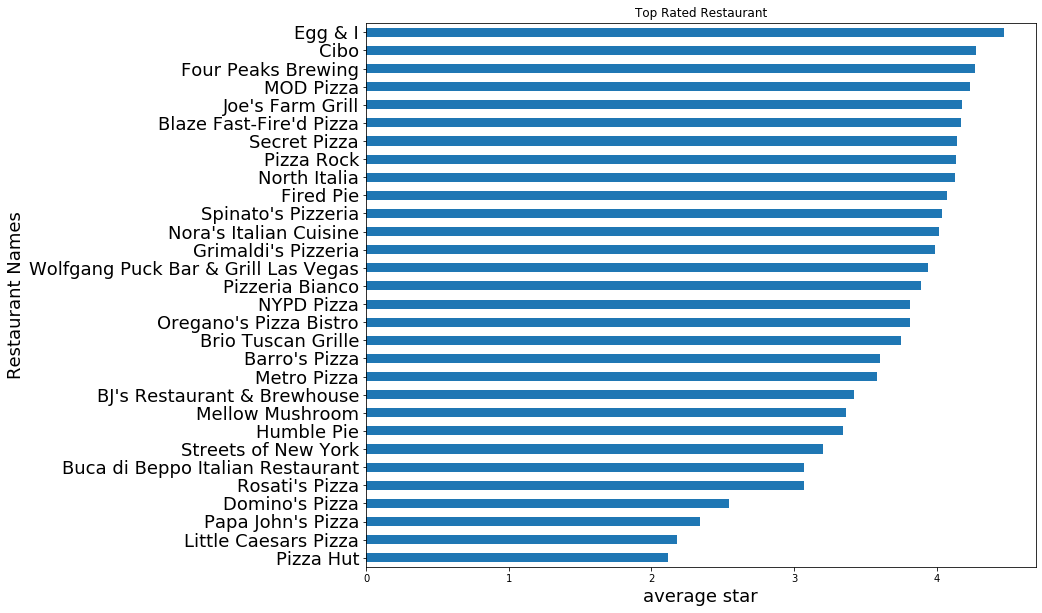

In [26]:
#rating the top 30 popular pizza restaurants by stars
review_top.groupby(review_top.name)['stars'].mean().sort_values(ascending=True).plot(kind='barh',figsize=(12,10))
plt.yticks(fontsize=18)
plt.xlabel("average star", fontsize=18)
plt.ylabel("Restaurant Names", fontsize=18)
plt.title("Top Rated Restaurant")

rating the top 30 popular pizza restaurants by usefel

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text yticklabel objects>)

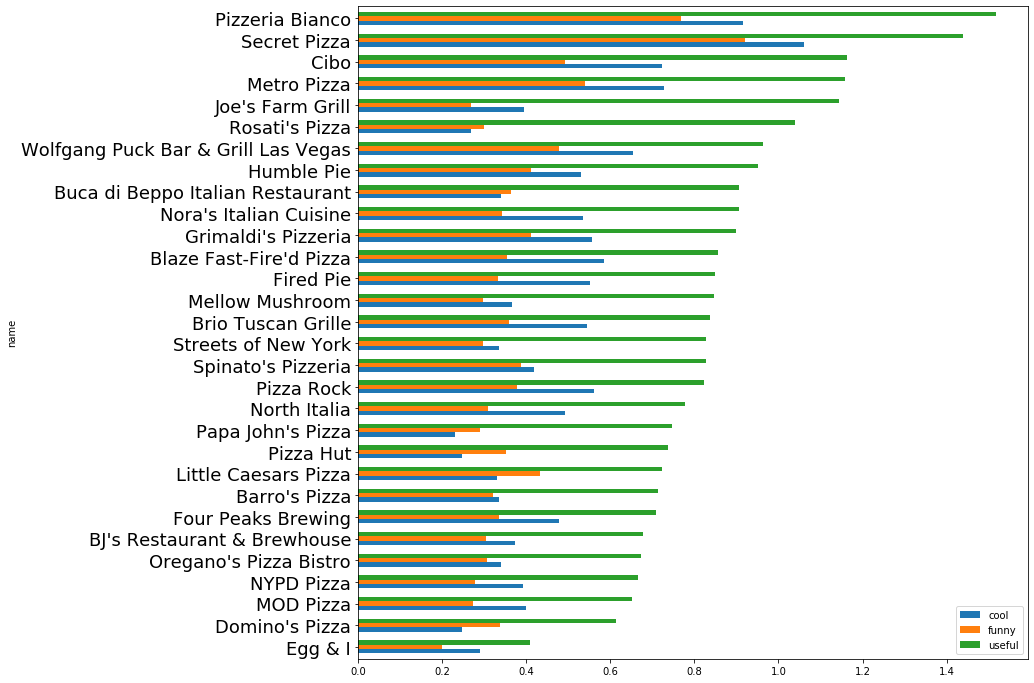

In [27]:
#rating the top 30 popular pizza restaurants by usefel
review_top.groupby(review_top.name)['cool','funny','useful'].mean().sort_values('useful', ascending=True).plot(kind='barh',figsize=(12,12), width=0.6)
plt.yticks(fontsize=18)

generating the reviews file containning the pizza restaurants

In [28]:
pizza = data.loc[data['name'].notnull()]#pizza is the reviews whose corresponding restaurant categories have pizza
pizza.head()
pd.DataFrame.to_csv(pizza, 'data//model//pizza_review.csv')

In [29]:
pizza.shape

(394428, 11)

In [30]:
pizza['user_id'].shape
pizza_user = pizza[['user_id', 'business_id']]

In [31]:
#isDuplicated = pizza_user.duplicated('user_id')
pizza_user = pizza_user.drop_duplicates('user_id')

In [32]:
pizza_user.shape

(233863, 2)

In [33]:
pizza_user = pd.DataFrame(pizza_user)
#pd.DataFrame.to_csv(pizza_user, 'data//model//pizza_user.csv')

In [34]:
data[['year','month','day_time']] = data.date.str.split("-",expand=True)

Text(0.5, 1.0, 'Average Star per Years')

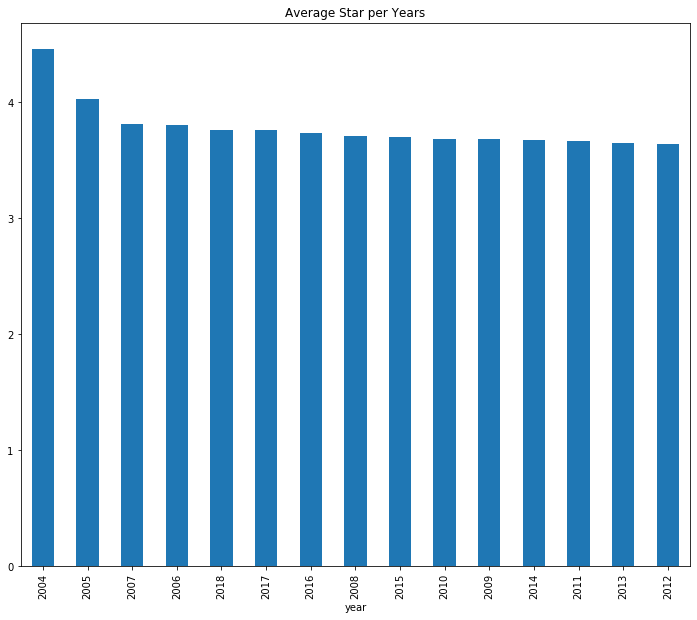

In [35]:
star_y = data.groupby(data.year)['stars'].mean().sort_values(ascending=False)
star_y.plot(kind='bar',figsize=(12,10))
plt.title("Average Star per Years")

Text(0.5, 1.0, 'Average useful, cool and funny per year')

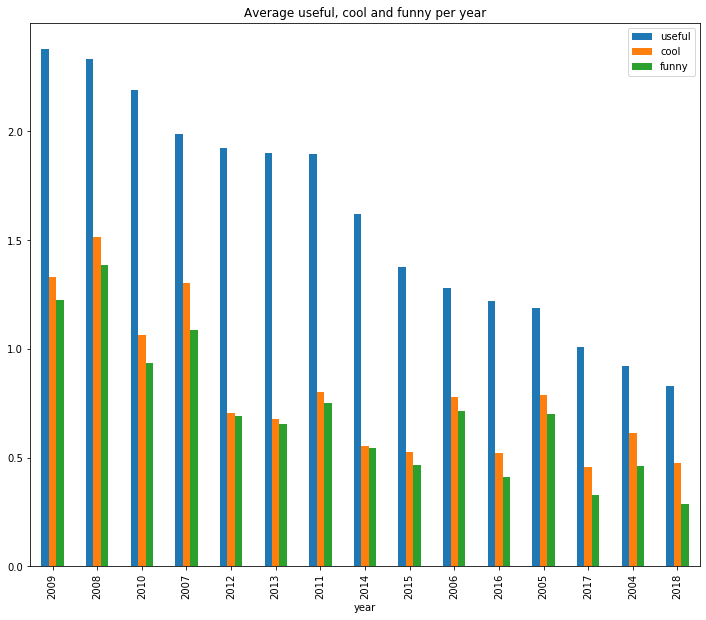

In [36]:
ucf_y = data.groupby(data.year)['useful','cool','funny'].mean().sort_values('useful',ascending=False)
ucf_y.plot(kind='bar',figsize=(12,10))
plt.title("Average useful, cool and funny per year")

In [37]:
pizza[['year','month','day_time']] = pizza.date.str.split("-",expand=True)

C:\Users\Tansu\Anaconda3\envs\tf\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [38]:
pizza.head()

,Unnamed: 0,business_id,cool,date,funny,review_id,stars,text,useful,user_id,name,year,month,day_time
5,5,eU_713ec6fTGNO4BegRaww,0,2013-01-20 13:25:59,0,fdiNeiN_hoCxCMy2wTRW9g,4.0,I'll be the first to admit that I was not exci...,0,w31MKYsNFMrjhWxxAb5wIw,La Tavola Italiana,2013,01,20 13:25:59
15,15,YvrylyuWgbP90RgMqZQVnQ,0,2017-04-07 21:27:49,0,svK3nBU7Rk8VfGorlrN52A,5.0,You can't really find anything wrong with this...,0,NJlxGtouq06hhC7sS2ECYw,Jz's Pizza,2017,04,07 21:27:49
19,19,y-Iw6dZflNix4BdwIyTNGA,0,2014-06-27 21:19:23,0,4bUyL7lzoWzDZaJETAKREg,3.0,Good selection of classes of beers and mains. ...,0,_N7Ndn29bpll_961oPeEfw,Indie Ale House,2014,06,27 21:19:23
20,20,qx6WhZ42eDKmBchZDax4dQ,0,2017-03-27 01:14:37,0,Amo5gZBvCuPc_tZNpHwtsA,5.0,"Our family LOVES the food here. Quick, friendl...",1,DzZ7piLBF-WsJxqosfJgtA,Casanova Brothers Pizza,2017,03,27 01:14:37
22,22,I4Nr-MVc26qWr08-S3Q1ow,0,2016-01-17 05:26:22,0,IByf6mVY0WA838XNSh-5MA,4.0,The food is always good and the prices are rea...,0,3CJUJILq7CLHk_9OrvpvQg,Greenberg's Deli,2016,01,17 05:26:22


Text(0.5, 1.0, 'Average star of pizza restaurant per year')

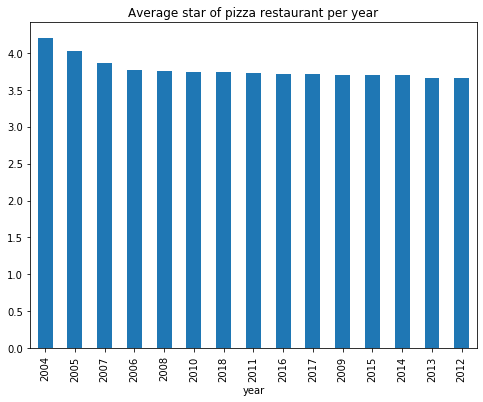

In [39]:
pizza.groupby(pizza.year)['stars'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(8,6))
plt.title("Average star of pizza restaurant per year")

Text(0.5, 1.0, 'Relative Average Star of Pizza Restaurant per Year')

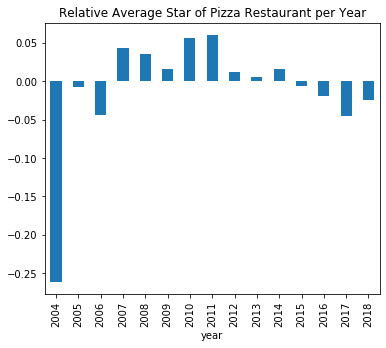

In [40]:
star_py=pizza.groupby(pizza.year)['stars'].mean().sort_values(ascending=False)
star_py_1 = star_py - star_y
star_py_1.plot(kind='bar',figsize=(6,5))
plt.title("Relative Average Star of Pizza Restaurant per Year")

Text(0.5, 1.0, 'Average useful, cool and funny of pizza restaurant per year')

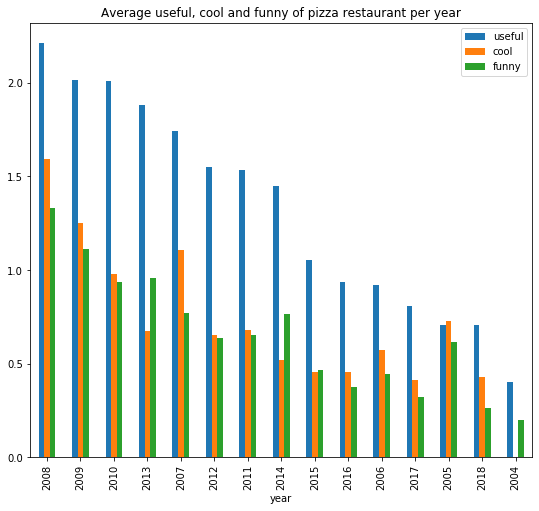

In [41]:
pizza.groupby(pizza.year)['useful','cool','funny'].mean().sort_values('useful',ascending=False).plot(kind='bar',figsize=(9,8))
plt.title("Average useful, cool and funny of pizza restaurant per year")

In [42]:
review_top.groupby(review_top.name)['cool','funny','useful'].mean().sort_values('useful', ascending=True).index

Index(['Egg & I', 'Domino's Pizza', 'MOD Pizza', 'NYPD Pizza',
       'Oregano's Pizza Bistro', 'BJ's Restaurant & Brewhouse',
       'Four Peaks Brewing', 'Barro's Pizza', 'Little Caesars Pizza',
       'Pizza Hut', 'Papa John's Pizza', 'North Italia', 'Pizza Rock',
       'Spinato's Pizzeria', 'Streets of New York', 'Brio Tuscan Grille',
       'Mellow Mushroom', 'Fired Pie', 'Blaze Fast-Fire'd Pizza',
       'Grimaldi's Pizzeria', 'Nora's Italian Cuisine',
       'Buca di Beppo Italian Restaurant', 'Humble Pie',
       'Wolfgang Puck Bar & Grill Las Vegas', 'Rosati's Pizza',
       'Joe's Farm Grill', 'Metro Pizza', 'Cibo', 'Secret Pizza',
       'Pizzeria Bianco'],
      dtype='object', name='name')

Text(0.5, 1.0, 'Midwood Smokehouse')

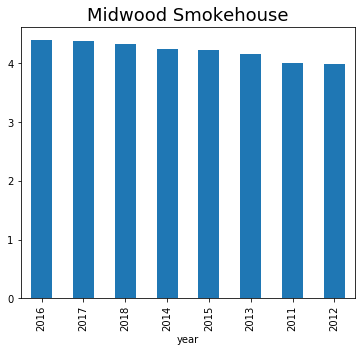

In [43]:
name="Midwood Smokehouse"
pizza_e=pizza.loc[pizza['name']==name]
pizza_e.groupby(pizza_e.year)['stars'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(6,5))
plt.title(name, fontsize=18)

Text(0.5, 1.0, 'Midwood Smokehouse')

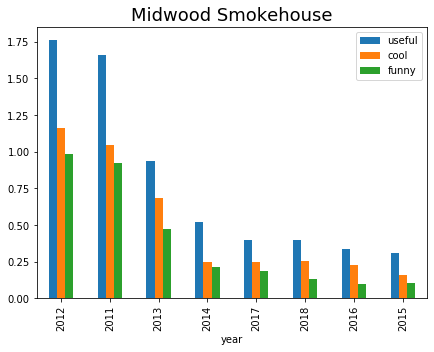

In [44]:
pizza_e.groupby(pizza_e.year)['useful','cool','funny'].mean().sort_values('useful',ascending=False).plot(kind='bar',figsize=(7,5))
plt.title(name, fontsize=18)

In [46]:
pizza.shape

(394428, 14)